<img src="https://www.kaggle.com/static/images/site-logo.png" width="100px">

**A Tutorial on Different approaches for Outlier Detection**

<img src="https://cdn-images-1.medium.com/max/1200/1*jHnpc23F7-rh9cLkh-028g.png" width="700px">

Context
Manufacturing process feature selection and categorization

Content
Abstract: Data from a semi-conductor manufacturing process

- Data Set Characteristics: Multivariate
- Number of Instances: 1567
- Area: Computer
- Attribute Characteristics: Real
- Number of Attributes: 591
- Date Donated: 2008-11-19
- Associated Tasks: Classification,Causal-Discovery
- Missing Values? Yes

A complex modern semi-conductor manufacturing process is normally under consistent
surveillance via the monitoring of signals/variables collected from sensors and or
process measurement points. However, not all of these signals are equally valuable
in a specific monitoring system. The measured signals contain a combination of
useful information, irrelevant information as well as noise. It is often the case
that useful information is buried in the latter two. Engineers typically have a
much larger number of signals than are actually required. If we consider each type
of signal as a feature, then feature selection may be applied to identify the most
relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will
enable an increase in process throughput, decreased time to learning and reduce the
per unit production costs.

To enhance current business improvement techniques the application of feature
selection as an intelligent systems technique is being investigated.

The dataset presented in this case represents a selection of such features where
each example represents a single production entity with associated measured
features and the labels represent a simple pass/fail yield for in house line
testing, figure 2, and associated date time stamp. Where .1 corresponds to a pass
and 1 corresponds to a fail and the data time stamp is for that specific test
point.

Using feature selection techniques it is desired to rank features according to
their impact on the overall yield for the product, causal relationships may also be
considered with a view to identifying the key features.

Results may be submitted in terms of feature relevance for predictability using
error rates as our evaluation metrics. It is suggested that cross validation be
applied to generate these results. Some baseline results are shown below for basic
feature selection techniques using a simple kernel ridge classifier and 10 fold
cross validation.

Baseline Results: Pre-processing objects were applied to the dataset simply to
standardize the data and remove the constant features and then a number of
different feature selection objects selecting 40 highest ranked features were
applied with a simple classifier to achieve some initial results. 10 fold cross
validation was used and the balanced error rate (*BER) generated as our initial
performance metric to help investigate this dataset.

SECOM Dataset: 1567 examples 591 features, 104 fails

FSmethod (40 features) BER % True + % True - %
S2N (signal to noise) 34.5 +-2.6 57.8 +-5.3 73.1 +2.1
Ttest 33.7 +-2.1 59.6 +-4.7 73.0 +-1.8
Relief 40.1 +-2.8 48.3 +-5.9 71.6 +-3.2
Pearson 34.1 +-2.0 57.4 +-4.3 74.4 +-4.9
Ftest 33.5 +-2.2 59.1 +-4.8 73.8 +-1.8
Gram Schmidt 35.6 +-2.4 51.2 +-11.8 77.5 +-2.3

Attribute Information:

Key facts: Data Structure: The data consists of 2 files the dataset file SECOM
consisting of 1567 examples each with 591 features a 1567 x 591 matrix and a labels
file containing the classifications and date time stamp for each example.

As with any real life data situations this data contains null values varying in
intensity depending on the individuals features. This needs to be taken into
consideration when investigating the data either through pre-processing or within
the technique applied.

The data is represented in a raw text file each line representing an individual
example and the features seperated by spaces. The null values are represented by
the 'NaN' value as per MatLab.

Acknowledgements
Authors: Michael McCann, Adrian Johnston

Inspiration
Semiconductor manufacturing has multi dimensional description of each process. Can we find key performance index by using big data techniques?

**Import Some Basic Libraries**

In [ ]:
# for basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# to avoid warnings
#import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the Data(UCI- SECOM Dataset)**

In [ ]:
# reading the data
data = pd.read_csv('/content/drive/My Drive/Data/uci-secom.csv')

# getting the shape of the data
print(data.shape)

(1567, 592)


In [ ]:
# getting the head of the data
data.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# checking if the dataset contains any NULL values

data.isnull().any().any()

True

In [ ]:
# Replacing all the NaN values with 0 as the values correspond to the test results.
# since, the values are not present that means the values are not available or calculated
# so better we not take median or mean and replace them with zeros
print(data.shape)
data = data.replace(np.NaN, 0)

# again, checking if there is any NULL values left
print(data.shape)
data.isnull().any().any()

(1567, 592)
(1567, 592)


False

# Data Visualization

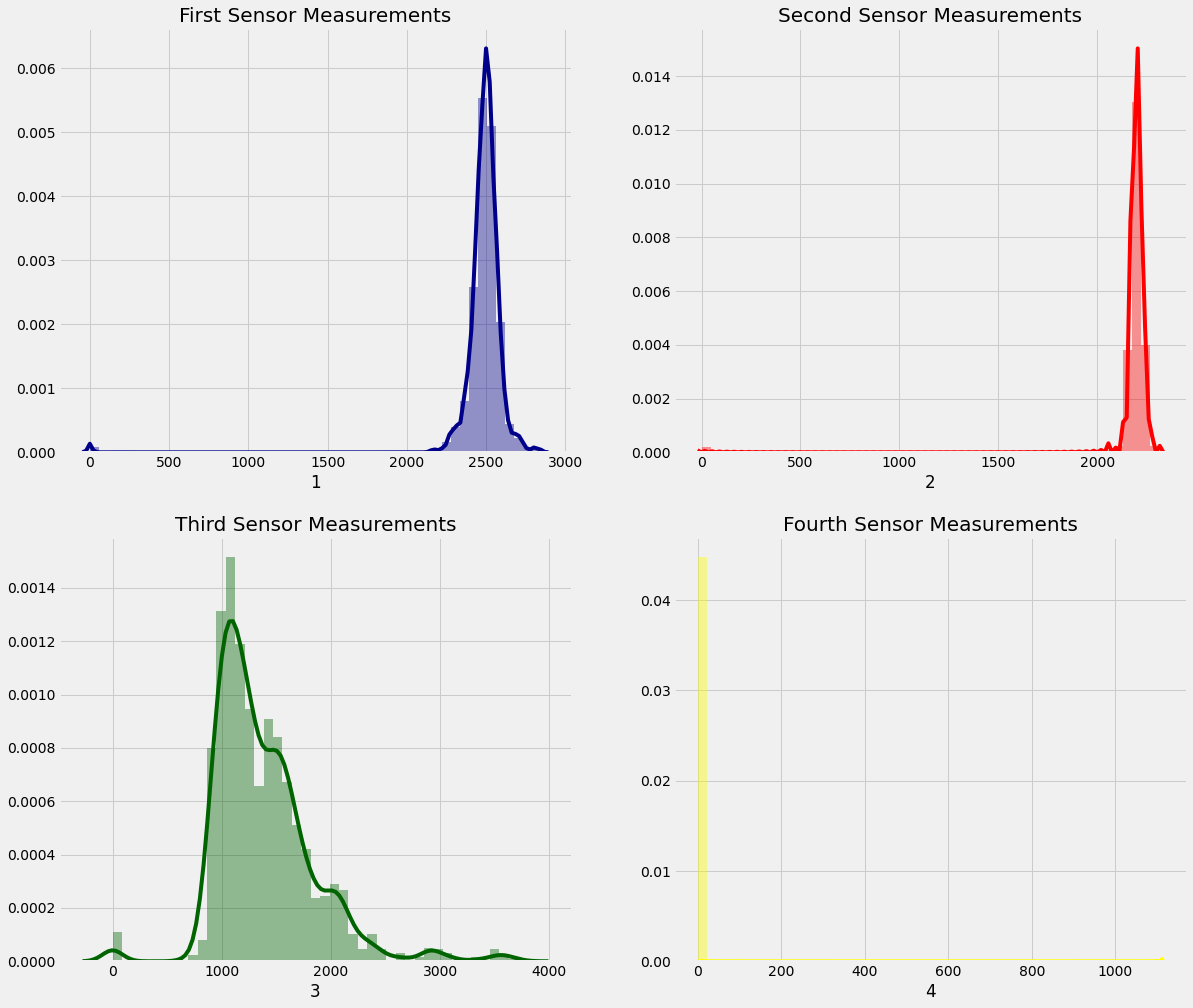

In [ ]:
# distribution plot to see first four column's distribution

plt.rcParams['figure.figsize'] = (18, 16)

plt.subplot(2, 2, 1)
sns.distplot(data['1'], color = 'darkblue')
plt.title('First Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 2)
sns.distplot(data['2'], color = 'red')
plt.title('Second Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 3)
sns.distplot(data['3'], color = 'darkgreen')
plt.title('Third Sensor Measurements', fontsize = 20)

plt.subplot(2, 2, 4)
sns.distplot(data['4'], color = 'yellow')
plt.title('Fourth Sensor Measurements', fontsize = 20)

plt.show()

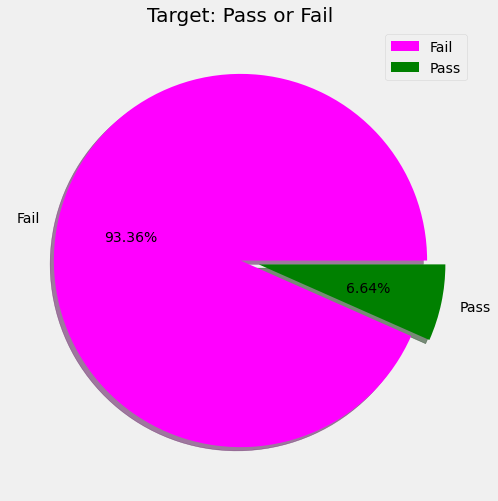

In [ ]:
# pie chart

labels = ['Fail', 'Pass']
size = data['Pass/Fail'].value_counts()
colors = ['magenta', 'green']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels =labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = True)
plt.axis('off')
plt.title('Target: Pass or Fail', fontsize = 20)
plt.legend()
plt.show()

Text(0.5, 1.0, 'Heatmap for the Data')

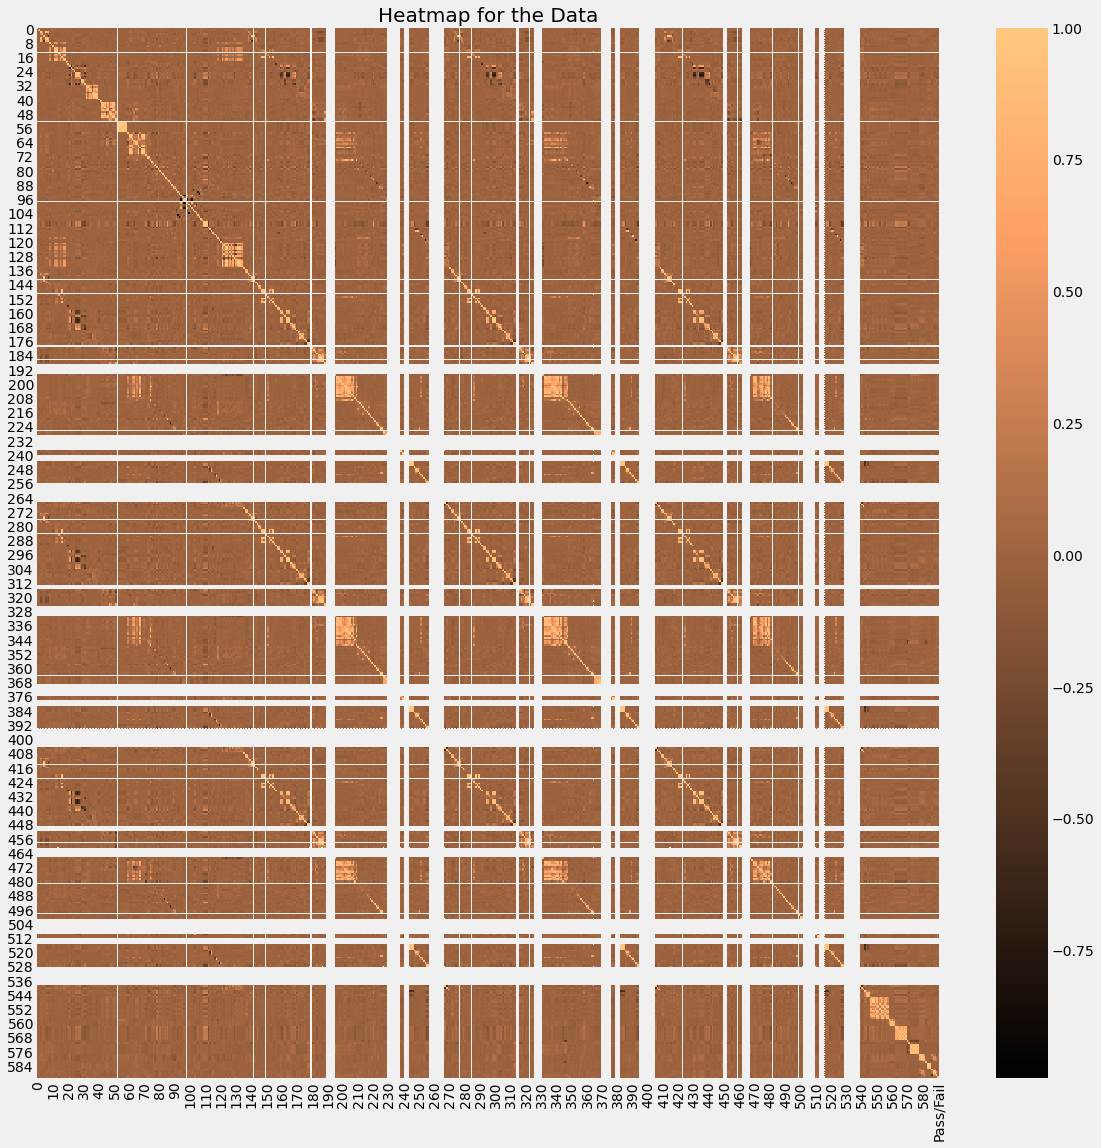

In [ ]:
# heatmap

plt.rcParams['figure.figsize'] = (18, 18)
sns.heatmap(data.corr(), cmap = 'copper')
plt.title('Heatmap for the Data', fontsize = 20)

In [ ]:
data.columns

Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)

In [ ]:
data['Pass/Fail'].value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

Find most important features for EDA

In [ ]:
data_corr=data.corr(method ='pearson').sort_values(by='Pass/Fail',ascending=False)['Pass/Fail']
data_corr

Pass/Fail    1.000000
59           0.156108
103          0.149140
348          0.134289
510          0.131907
               ...   
534               NaN
535               NaN
536               NaN
537               NaN
538               NaN
Name: Pass/Fail, Length: 591, dtype: float64

In [ ]:
print(data_corr.shape)
data_corr=data_corr.dropna()
print(data_corr.shape)

(591,)
(479,)


In [ ]:
column_filter=data_corr[np.abs(data_corr.values)>0.1].index
print(type(column_filter))
column_filter=column_filter.tolist()[1:]
column_filter

<class 'pandas.core.indexes.base.Index'>


['59',
 '103',
 '348',
 '510',
 '21',
 '431',
 '434',
 '430',
 '435',
 '210',
 '436',
 '129',
 '28']

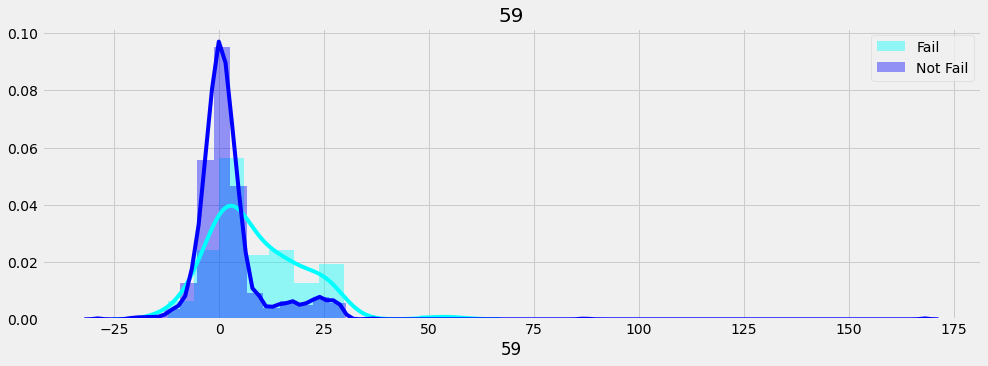

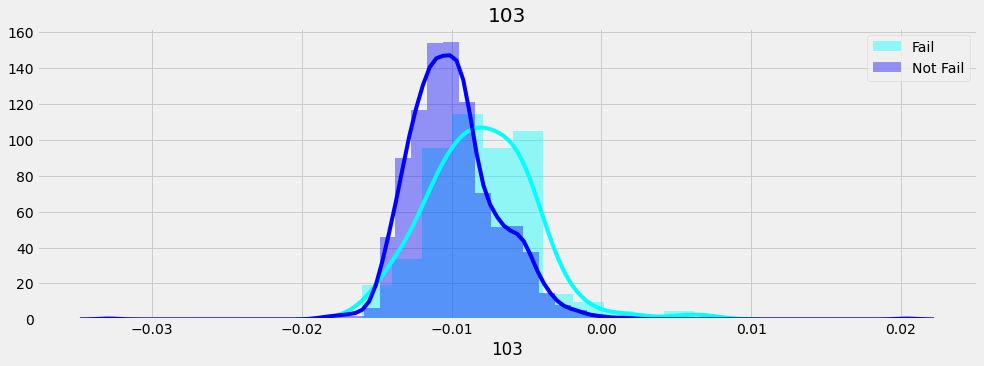

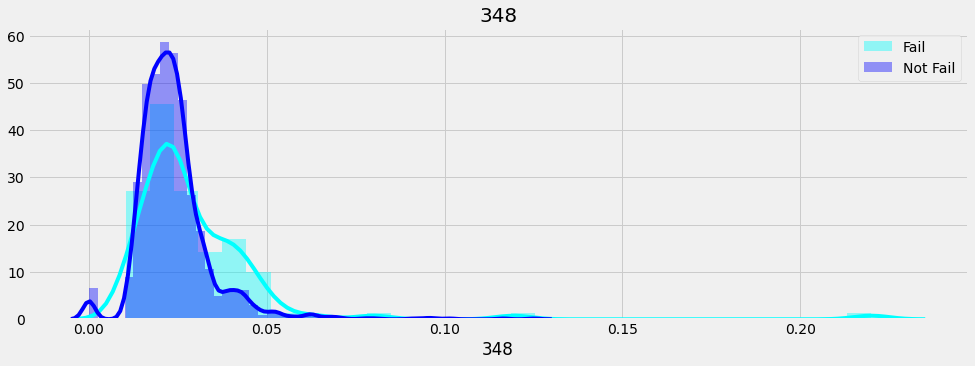

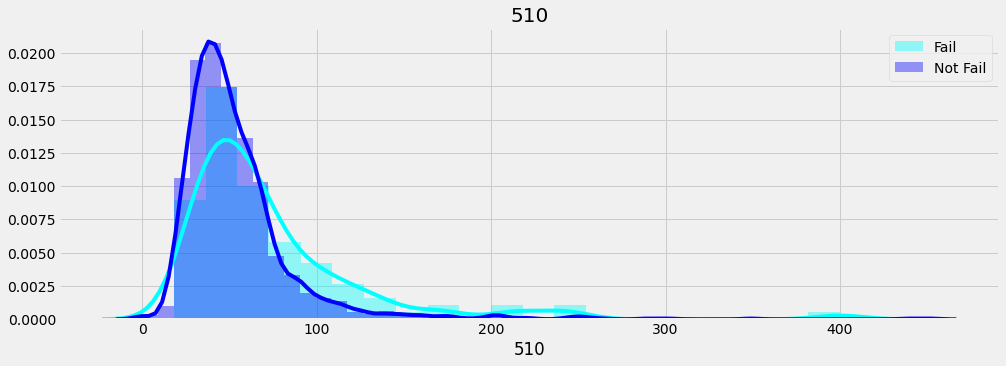

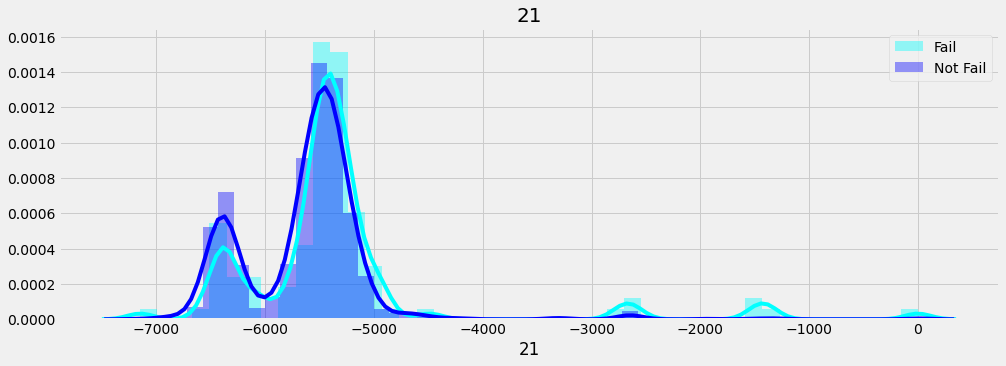

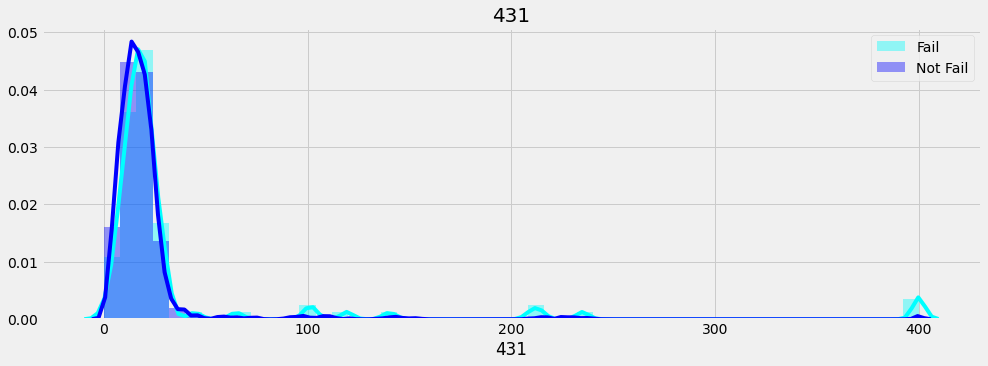

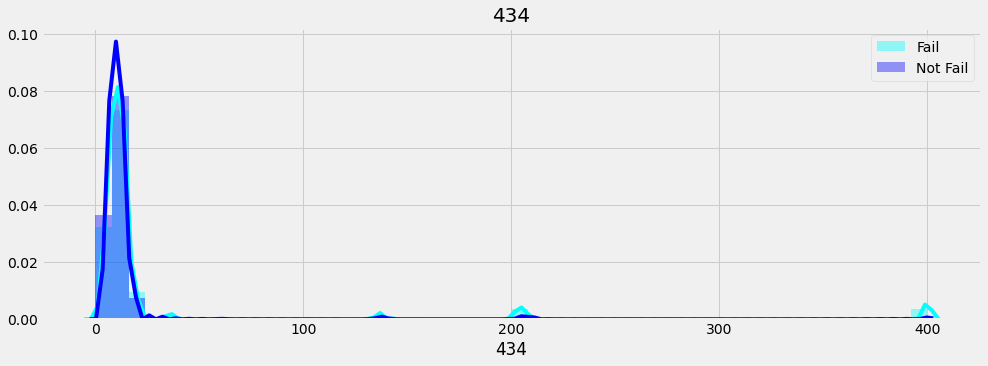

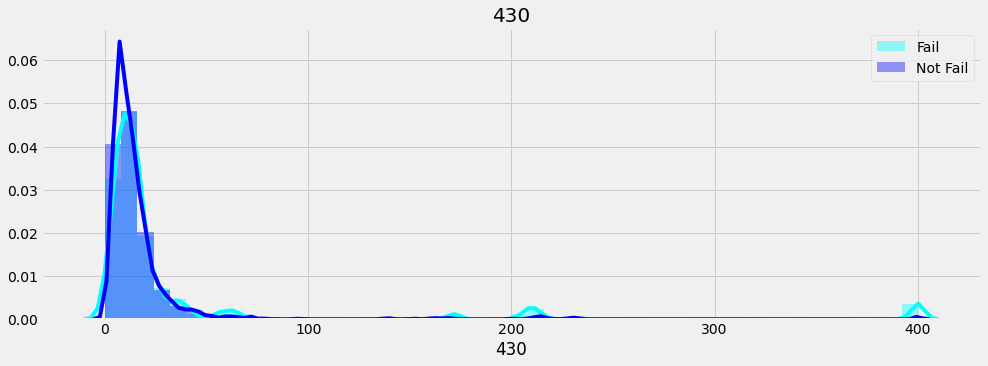

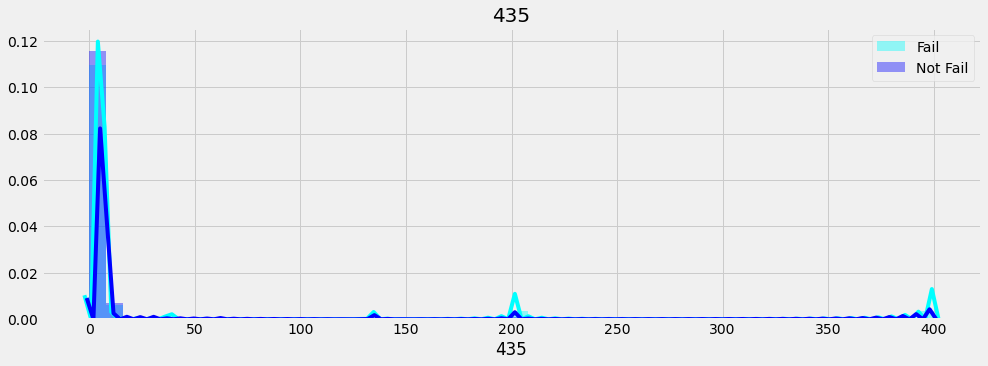

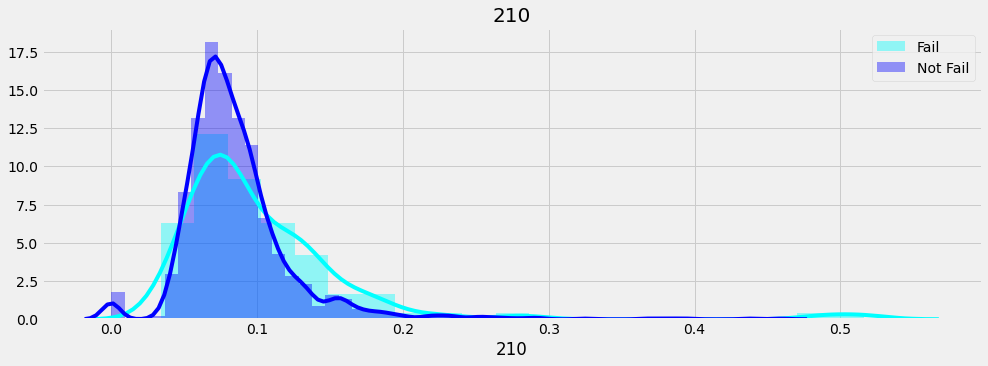

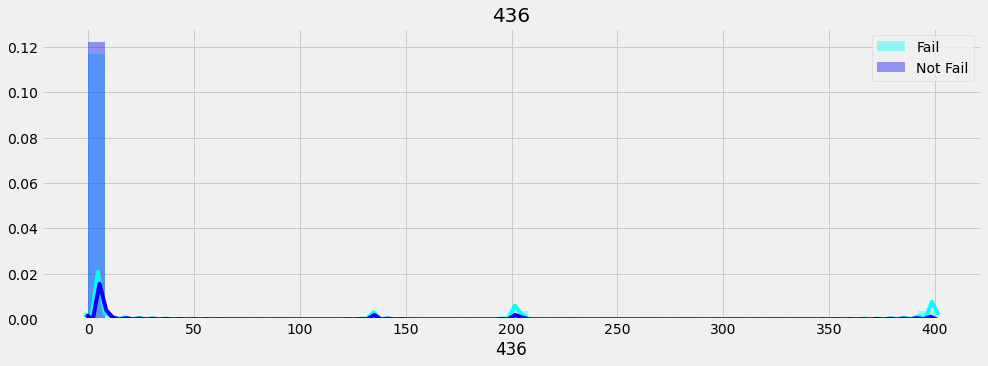

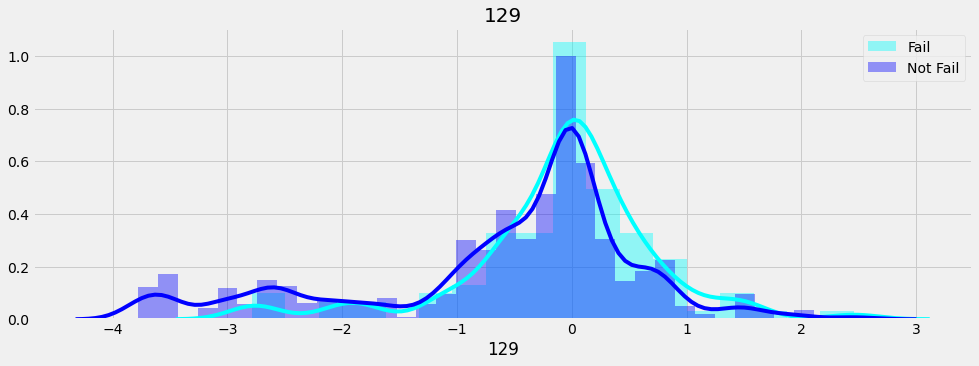

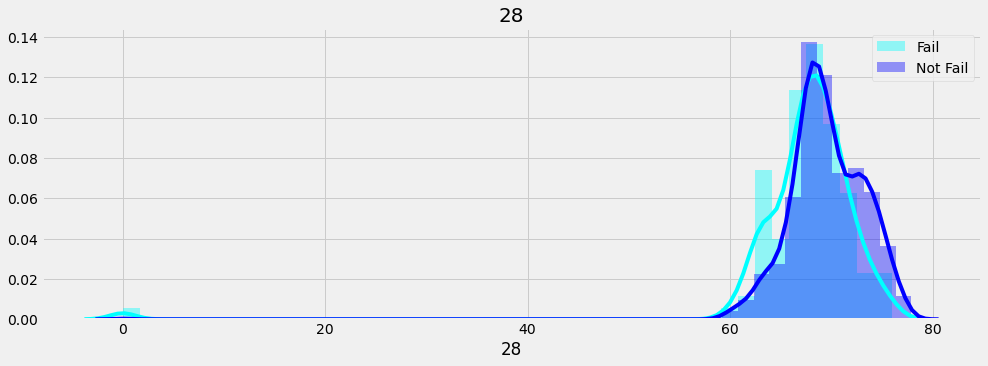

In [ ]:
for column in column_filter:
  plt.style.use('fivethirtyeight')
  plt.rcParams['figure.figsize'] = (15, 5)
  sns.distplot(data[column][data['Pass/Fail']==1], color = 'cyan',label='Fail')
  sns.distplot(data[column][data['Pass/Fail']==-1], color = 'b',label='Not Fail')
  plt.title(column, fontsize = 20)
  plt.legend()
  plt.show()

<Figure size 1440x1800 with 0 Axes>

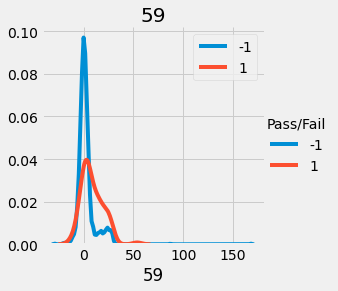

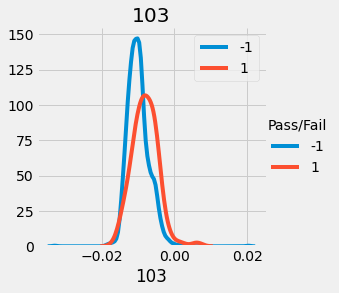

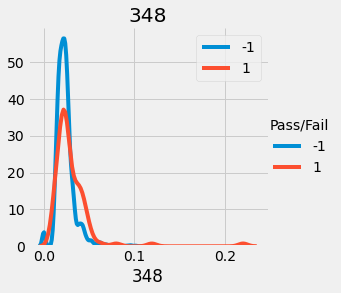

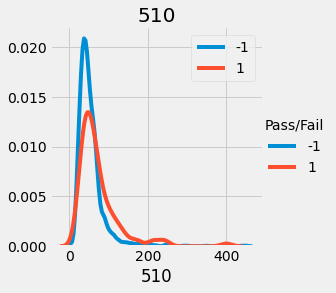

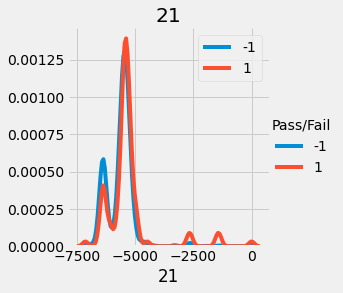

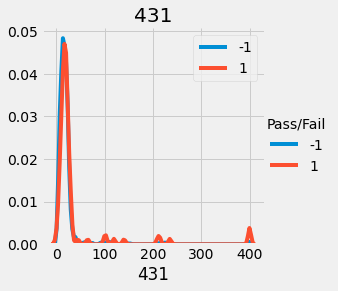

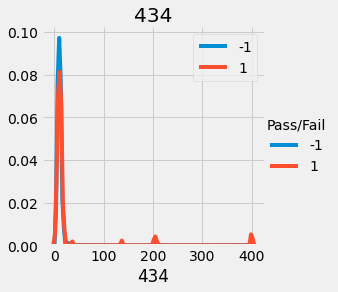

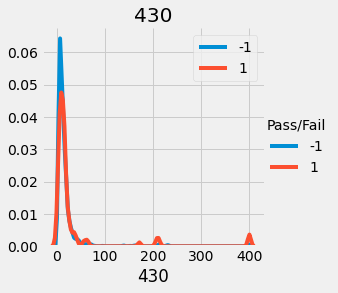

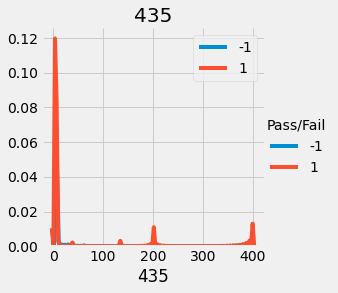

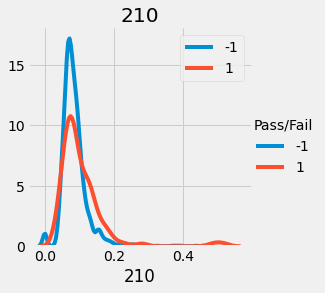

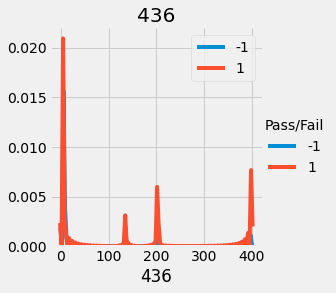

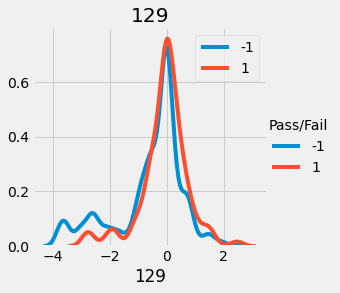

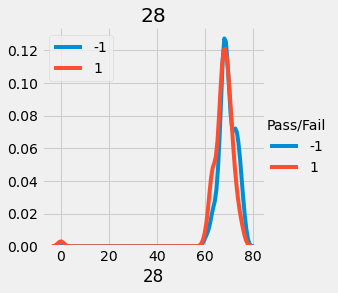

<function matplotlib.pyplot.tight_layout>

In [ ]:
plt.figure(figsize=(20, 25))

for i, column in enumerate(column_filter, 1):
  #plt.subplot(11, 3, i)
  g=sns.FacetGrid(data, hue="Pass/Fail",height=4) \
   .map(sns.kdeplot, column) \
   .add_legend()
  axes = g.axes.flatten()
  axes[0].set_title(column)
  plt.ioff() 
  plt.legend()
  #plt.xlabel(column)
  plt.show()
plt.tight_layout

In [ ]:
column_filter

['59',
 '103',
 '348',
 '510',
 '21',
 '431',
 '434',
 '430',
 '435',
 '210',
 '436',
 '129',
 '28']

In [ ]:
column_filter.append('Pass/Fail')
column_filter

['59',
 '103',
 '348',
 '510',
 '21',
 '431',
 '434',
 '430',
 '435',
 '210',
 '436',
 '129',
 '28',
 'Pass/Fail']

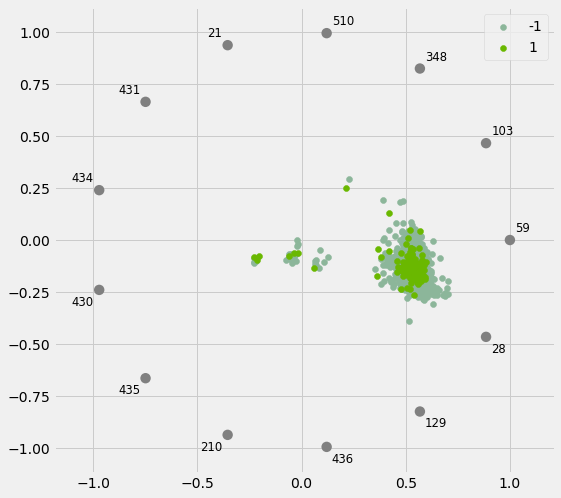

In [ ]:
#RadViz
fig,ax=plt.subplots(figsize=(8, 8))
pd.plotting.radviz(data[column_filter], 'Pass/Fail',ax=ax) 
plt.show() 

In [ ]:
import plotly.express as px
fig = px.parallel_coordinates(data[column_filter], color="Pass/Fail",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             #color_continuous_midpoint=2
                              )
fig.show()

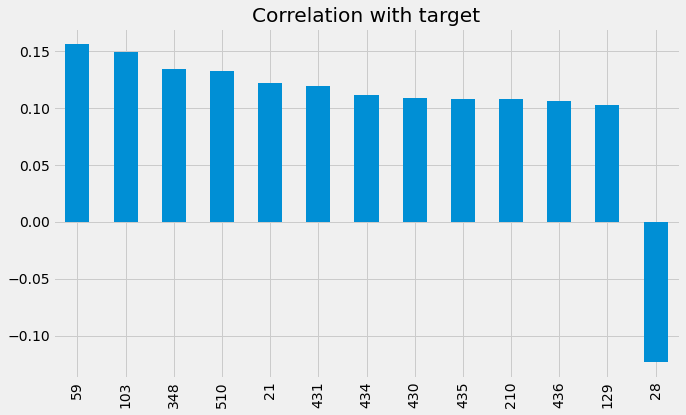

In [ ]:
data[column_filter].drop('Pass/Fail', axis=1).corrwith(data['Pass/Fail']).plot(kind='bar', grid=True, figsize=(10, 6), 
                                                   title="Correlation with target")

#Data Preprocessing

In [ ]:
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 591)

In [ ]:
y.value_counts(normalize=True)

-1    0.933631
 1    0.066369
Name: Pass/Fail, dtype: float64

In [ ]:
# separating the dependent and independent data

x = data.iloc[:,:590]
y = data.iloc[:, 590]

# getting the shapes of new data sets x and y
print("shape of x:", x.shape)
print("shape of y:", y.shape)

shape of x: (1567, 590)
shape of y: (1567,)


In [ ]:
# splitting them into train test and split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,stratify=y, random_state = 0)

# gettiing the shapes
print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)

shape of x_train:  (1253, 590)
shape of x_test:  (314, 590)
shape of y_train:  (1253,)
shape of y_test:  (314,)


In [ ]:
y_train.value_counts(normalize=True)

-1    0.933759
 1    0.066241
Name: Pass/Fail, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

-1    0.933121
 1    0.066879
Name: Pass/Fail, dtype: float64

In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# fitting independent data to the model
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# 1.UnderSamling of the Dataset

> Under-representation of a class in one or more important predictor variables. Suppose, to address the question of gender discrimination, we have survey data on salaries within a particular field, e.g., computer software. It is known women are under-represented considerably in a random sample of software engineers, which would be important when adjusting for other variables such as years employed and current level of seniority. Suppose only 20% of software engineers are women, i.e., males are 4 times as frequent as females. If we were designing a survey to gather data, we would survey 4 times as many females as males, so that in the final sample, both genders will be represented equally. (See also Stratified Sampling.)
Under-representation of one class in the outcome (dependent) variable. Suppose we want to predict, from a large clinical dataset, which patients are likely to develop a particular disease (e.g., diabetes). Assume, however, that only 10% of patients go on to develop the disease. Suppose we have a large existing dataset. We can then pick 1/9th the number of patients who did not go on to develop the disease for every one patient who did.

In [ ]:
# Under Sampling

failed_tests = np.array(data[data['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [ ]:
failed_tests

array([   2,   10,   11,   14,   23,   38,   40,   45,   48,   49,   50,
         57,   58,   62,   64,   82,   96,  115,  131,  154,  157,  158,
        167,  169,  180,  182,  186,  188,  189,  218,  222,  231,  235,
        236,  238,  240,  241,  243,  244,  273,  277,  282,  291,  294,
        321,  323,  326,  327,  336,  344,  351,  368,  373,  392,  406,
        424,  441,  448,  495,  508,  518,  576,  583,  601,  605,  634,
        709,  795,  797,  826,  831,  871,  914,  924,  926,  929, 1029,
       1062, 1144, 1151, 1185, 1189, 1211, 1227, 1238, 1241, 1242, 1254,
       1302, 1303, 1324, 1325, 1327, 1328, 1329, 1342, 1343, 1363, 1364,
       1365, 1400, 1438, 1443, 1519])

In [ ]:
normal_indices = data[data['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [ ]:
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices = np.array(random_normal_indices)

print(len(random_normal_indices))

104


In [ ]:
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [ ]:
under_sample # index only

array([   2,   10,   11,   14,   23,   38,   40,   45,   48,   49,   50,
         57,   58,   62,   64,   82,   96,  115,  131,  154,  157,  158,
        167,  169,  180,  182,  186,  188,  189,  218,  222,  231,  235,
        236,  238,  240,  241,  243,  244,  273,  277,  282,  291,  294,
        321,  323,  326,  327,  336,  344,  351,  368,  373,  392,  406,
        424,  441,  448,  495,  508,  518,  576,  583,  601,  605,  634,
        709,  795,  797,  826,  831,  871,  914,  924,  926,  929, 1029,
       1062, 1144, 1151, 1185, 1189, 1211, 1227, 1238, 1241, 1242, 1254,
       1302, 1303, 1324, 1325, 1327, 1328, 1329, 1342, 1343, 1363, 1364,
       1365, 1400, 1438, 1443, 1519,  889,  203,  508,  721,  110,  596,
        315,   55,  226,  745,  799,  332,  912,  495,  523,  886,  281,
        847,  991,  895,  471,  154,  312,  959, 1027,  543, 1193,  645,
        663,  468, 1101,  770,  872,  533, 1244,  115,  988, 1297,  116,
       1239,  992,  681,  981,  876,  264,  713, 12

In [ ]:
# creating the undersample data

undersample_data = data.iloc[under_sample, :]

In [ ]:

# splitting the undersample dataset into x and y sets

x = undersample_data.iloc[:, undersample_data.columns != 'Pass/Fail'] 
y = undersample_data.iloc[:, undersample_data.columns == 'Pass/Fail']

print(x.shape)
print(y.shape)

(208, 590)
(208, 1)


In [ ]:
from sklearn.model_selection import train_test_split

x_train_us, x_test_us, y_train_us, y_test_us = train_test_split(x, y, test_size = 0.2, 
                                                                stratify=y,random_state = 0)

print(x_train_us.shape)
print(y_train_us.shape)
print(x_test_us.shape)
print(y_test_us.shape)

(166, 590)
(166, 1)
(42, 590)
(42, 1)


In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train_us)
x_test = sc.transform(x_test_us)

**Xg-Boost Classifier**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix,classification_report

model = XGBClassifier()

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)
print(classification_report(y_test_us,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



              precision    recall  f1-score   support

          -1       0.75      0.63      0.69        19
           1       0.73      0.83      0.78        23

    accuracy                           0.74        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.74      0.74      0.73        42



**Confusion Matrix after UnderSampling with XgBoost**

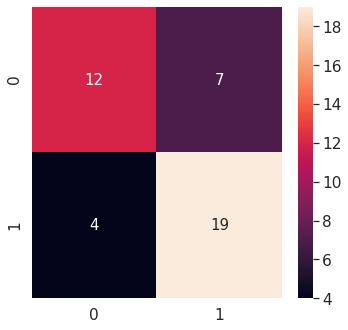

In [ ]:


cm = confusion_matrix(y_test_us, y_pred)


plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
sns.heatmap(cm, annot = True, annot_kws = {"size": 15})

# It is able to predict 17 defected semiconductors among 21 Semi-Conductors

> **UnderSamoling,** It successfully detected 17 out of 22 defected semiconductors which is great. It would have work much better if we had some more data.

In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

parameters = [{'max_depth' : [1, 2, 3, 4, 5, 6]}]

grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)

grid_search = grid_search.fit(x_train_us, y_train_us)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.5662650602409638
Best Parameter:  {'max_depth': 3}


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

weights = (y == 0).sum()/(1.0*(y == -1).sum())
model = XGBClassifier(max_depth = 3, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_train_us, y_train_us)

y_pred = model.predict(x_test_us)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
print(classification_report(y_test_us,y_pred))

              precision    recall  f1-score   support

          -1       0.75      0.63      0.69        19
           1       0.73      0.83      0.78        23

    accuracy                           0.74        42
   macro avg       0.74      0.73      0.73        42
weighted avg       0.74      0.74      0.73        42



**Most Important Features of the Model**

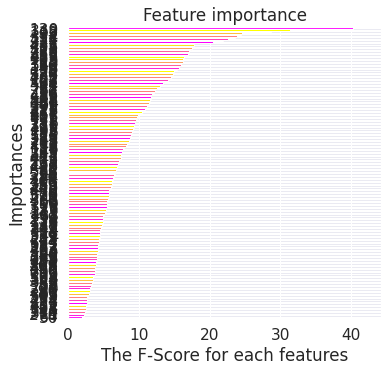

In [ ]:
# plotting the feature importances

colors = plt.cm.spring(np.linspace(0, 1, 9))
xgb.plot_importance(model, height = 1, color = colors, grid = True, importance_type = 'cover', show_values = False)

plt.rcParams['figure.figsize'] = (18, 20)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

# 2.Over-Sampling

>** SMOTE :**
There are a number of methods available to oversample a dataset used in a typical classification problem (using a classification algorithm to classify a set of images, given a labelled training set of images). The most common technique is known as SMOTE: Synthetic Minority Over-sampling Technique.[4] To illustrate how this technique works consider some training data which has s samples, and f features in the feature space of the data. Note that these features, for simplicity, are continuous. As an example, consider a dataset of birds for classification. The feature space for the minority class for which we want to oversample could be beak length, wingspan, and weight (all continuous). To then oversample, take a sample from the dataset, and consider its k nearest neighbors (in feature space). To create a synthetic data point, take the vector between one of those k neighbors, and the current data point. Multiply this vector by a random number x which lies between 0, and 1. Add this to the current data point to create the new, synthetic data point.

Many modifications and extensions have been made to the SMOTE method ever since its proposal

In [ ]:
# again creating x and y from the dataset

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [ ]:
y.value_counts()

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,
                                                                test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(1253, 590)

In [ ]:
from imblearn.over_sampling import SMOTE

x_resample, y_resample  = SMOTE().fit_sample(X_train, y_train.values.ravel())

print(x_resample.shape)
print(y_resample.shape)

(2340, 590)
(2340,)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_resample_sc = sc.fit_transform(x_resample)
X_test_sc = sc.transform(X_test)

**Xg-Boost Classifier**

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier()

model.fit(x_resample_sc, y_resample)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.98      0.96       293
           1       0.25      0.10      0.14        21

    accuracy                           0.92       314
   macro avg       0.59      0.54      0.55       314
weighted avg       0.89      0.92      0.90       314



In [ ]:
# Applying Grid Search CV to find the best model with the best parameters

from sklearn.model_selection import GridSearchCV

# making a parameters list
parameters = [{'max_depth' : [1, 10, 5, 7]}]

# making a grid search model
grid_search = GridSearchCV(estimator = model, param_grid = parameters, scoring = 'accuracy', cv = 2, n_jobs = -1)
grid_search = grid_search.fit(x_resample_sc, y_resample)

# getting the results
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_



In [ ]:
print("Best Accuracy: ", best_accuracy)
print("Best Parameter: ", best_parameters)

Best Accuracy:  0.9636752136752136
Best Parameter:  {'max_depth': 7}


In [ ]:
weights = (y == 1).sum()/(1.0*(y == -1).sum())
weights

0.0710868079289132

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

model = XGBClassifier(max_depth = 7, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_resample_sc, y_resample)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       293
           1       0.50      0.10      0.16        21

    accuracy                           0.93       314
   macro avg       0.72      0.54      0.56       314
weighted avg       0.91      0.93      0.91       314



In [ ]:
weights = (y == -1).sum()/(1.0*(y == 1).sum())
print(weights)
model = XGBClassifier(max_depth = 7, scale_pos_weights = weights, n_jobs = 4)

model.fit(x_resample_sc, y_resample)

y_pred = model.predict(X_test_sc)
print(classification_report(y_test,y_pred))

14.067307692307692
              precision    recall  f1-score   support

          -1       0.94      0.99      0.97       293
           1       0.50      0.10      0.16        21

    accuracy                           0.93       314
   macro avg       0.72      0.54      0.56       314
weighted avg       0.91      0.93      0.91       314



>** OverSampling**, Successfully detected 17 detected pieces out of 22, That is great according to accuracy. It would very well, if the size of the dataset would have been a little bigger.

#2.Under and oversampling DNN way:

In [ ]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
import itertools

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# reading the data
data = pd.read_csv('/content/drive/My Drive/Data/uci-secom.csv')

# getting the shape of the data
print(data.shape)
# deleting the first column

data = data.drop(columns = ['Time'], axis = 1)

# checking the shape of the data after deleting a column
data.shape

(1567, 592)


(1567, 591)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,-0.0057,0.9579,203.9867,0.0,11.7692,419.3404,10.2397,0.9693,193.7470,12.5373,1.4072,-5418.75,2608.00,-6228.25,356.00,1.2817,1.9540,7.0793,71.1444,2.2222,0.1753,3.4680,83.8405,8.7164,50.2482,64.3573,49.7518,66.2013,86.3672,120.5156,...,0.80,0.4754,8.5138,0.3141,85.1806,4.2063,1.0367,1.0972,0.3553,0.0929,32.3812,264.272,0.5671,4.98,0.0877,2.0902,0.0382,1.8844,15.4662,536.3418,2.0153,7.98,0.2363,2.6401,0.0785,1.4879,11.7256,0.0068,0.013

In [ ]:
data.isnull().sum().sort_values(ascending=False)

293          1429
292          1429
157          1429
158          1429
492          1341
             ... 
252             0
251             0
250             0
249             0
Pass/Fail       0
Length: 591, dtype: int64

In [ ]:
data = data.replace(np.NaN, 0)
data.shape

(1567, 591)

In [ ]:
# again creating x and y from the dataset
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", X.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [ ]:
y=y.replace(-1,0)
y.value_counts()

0    1463
1     104
Name: Pass/Fail, dtype: int64

In [ ]:
X_train_a, X_test, y_train_a, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X_train_a, y_train_a,test_size=0.2, 
                                    random_state=2018, stratify=y_train_a)
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(1567, 590)
(1002, 590)
(251, 590)
(314, 590)


In [ ]:
sc=StandardScaler()
X_train_tran=sc.fit_transform(X_train)
X_val_tran=sc.fit_transform(X_val)
X_test_tran=sc.fit_transform(X_test)

## ANN based model

In [ ]:
# Load Keras
from tensorflow import random
import tensorflow as tf
from tensorflow import keras

from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

In [ ]:
def plot_loss(history):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               #color=colors[n], 
               label='Train ')
  plt.semilogy(history.epoch,  history.history['val_loss'],
          #color=colors[n], 
          label='Val ',
          linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

In [ ]:
#def make_model():
tf.random.set_seed(42)
np.random.seed(42)
METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'), 
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]

DROPOUT = 0.2
# define the keras model with l1_l2 regularization with l1_lambda = 0.005 and l2_lambda = 0.005
#build the model
#----input-------#
model =Sequential()
model.add(Dense(30,input_dim=X_train_tran.shape[1],
      activation='relu'))
#----hiden layer-------#
model.add(Dropout(DROPOUT))
model.add(Dense(10,
          activation='relu',))
#model.add(Dropout(DROPOUT))
#----output-------#
model.add(Dense(1,activation='sigmoid'))  #binary: sigmoid. multi: softmax
model.summary()
# compiling the model
model.compile(optimizer='Adam', 
              #optimizer=keras.optimizers.SGD(lr=1e-3),
              loss='binary_crossentropy',
              metrics=METRICS
              )
#return model

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_172 (Dense)            (None, 30)                17730     
_________________________________________________________________
dropout_116 (Dropout)        (None, 30)                0         
_________________________________________________________________
dense_173 (Dense)            (None, 10)                310       
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 11        
Total params: 18,051
Trainable params: 18,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train.value_counts()

0    936
1     66
Name: Pass/Fail, dtype: int64

In [ ]:
y_val.value_counts()

0    234
1     17
Name: Pass/Fail, dtype: int64

In [ ]:
# network and training
EPOCHS = 200
BATCH_SIZE = 100

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_recall", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                callbacks=callbacks,
                verbose=0,
                #class_weight = 'auto',
                validation_data=(X_val_tran, y_val))

In [ ]:
predictions=model.predict_classes(X_test_tran)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Weight function DL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
a=y.value_counts()[0]/y.value_counts()[1]
a

14.067307692307692

In [ ]:
weights={1:0,0:a}

In [ ]:
# network and training
EPOCHS = 50
#BATCH_SIZE = 1000

# Set callback functions to early stop training and save the best model so far
callbacks = [EarlyStopping(monitor="val_loss", patience=3),
# Available metrics are: val_loss,val_tp,val_fp,val_tn,val_fn,val_accuracy,val_precision,val_recall,val_auc,loss,tp,fp,tn,fn,accuracy,precision,recall,auc
            ]
#training the moodel
model=make_model()
result=model.fit(X_train_tran, y_train,
                #batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                #callbacks=callbacks,
                verbose=0,
                class_weight = weights,
                validation_data=(X_val_tran, y_val))

In [ ]:
predictions=model.predict_classes(X_test_tran)
#y_test_labels = np.argmax(y_test.values, axis =1)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## ML method

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

In [ ]:
X_train_tran=sc.fit_transform(X_train)
X_test_tran=sc.fit_transform(X_test)

Logistic Regression

In [ ]:
penalty = 'l2'
C = 0.01
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = 1

logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)
logReg.fit(X_train, y_train)
y_pred=logReg.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       293
           1       0.10      0.19      0.13        21

    accuracy                           0.82       314
   macro avg       0.52      0.53      0.51       314
weighted avg       0.88      0.82      0.85       314



In [ ]:
logReg = LogisticRegression(penalty=penalty, C=C, 
            class_weight=class_weight, random_state=random_state, 
                            solver=solver, n_jobs=n_jobs)
logReg.fit(X_train_tran, y_train)
y_pred=logReg.predict(X_test_tran)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.79      0.86       293
           1       0.09      0.29      0.13        21

    accuracy                           0.75       314
   macro avg       0.51      0.54      0.50       314
weighted avg       0.88      0.75      0.81       314



XGB

In [ ]:
xgb=XGBClassifier(
                scale_pos_weight=99,
                              )
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       293
           1       0.20      0.24      0.22        21

    accuracy                           0.89       314
   macro avg       0.57      0.58      0.58       314
weighted avg       0.89      0.89      0.89       314



Random forest

In [ ]:
rf_cw = RandomForestClassifier(random_state=2018, 
                               class_weight='balanced',
                               n_jobs=-1)
rf_cw.fit(X_train, y_train)
y_pred=rf_cw.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



LGBM

In [ ]:
lgbm=LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
lgbm=LGBMClassifier(scale_pos_weight=14)
lgbm.fit(X_train, y_train)
y_pred=lgbm.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Try all method imbalanced

In [ ]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss,RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN,SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

In [ ]:
list_method={
# Under sampling
'NearMiss':NearMiss(),
'RandomUnderSampler':RandomUnderSampler(random_state=0),
'RepeatedEditedNearestNeighbours':RepeatedEditedNearestNeighbours(random_state=0), # Very long
'AllKNN':AllKNN(random_state=0),
#'CondensedNearestNeighbour':CondensedNearestNeighbour(random_state=0),
'OneSidedSelection':OneSidedSelection(random_state=0),
'NeighbourhoodCleaningRule':NeighbourhoodCleaningRule(random_state=0),

# Over sampling
'RandomOverSampler':RandomOverSampler(random_state=0),
'SMOTE':SMOTE(random_state=0),
'ADASYN':ADASYN(random_state=0),
'BorderlineSMOTE-1':BorderlineSMOTE(random_state=0, kind='borderline-1'),
'BorderlineSMOTE-2':BorderlineSMOTE(random_state=0, kind='borderline-2'),
'SVMSMOTE':SVMSMOTE(random_state=0),
}

In [ ]:
import time
for name,method in list_method.items():
  
  t0=time.time()
  print(name)
  X_train_transform, y_train_transform= method.fit_sample(X_train, y_train)
  model=LogisticRegression()
  model.fit(X_train_transform, y_train_transform)
  predictions=model.predict(X_test)
  #y_test_labels = np.argmax(y_test.values, axis =1)
  t1=time.time()
  print('time',t1-t0)
  print(classification_report(y_test,predictions))

NearMiss
time 0.18352484703063965
              precision    recall  f1-score   support

           0       0.96      0.29      0.45       293
           1       0.08      0.81      0.14        21

    accuracy                           0.32       314
   macro avg       0.52      0.55      0.29       314
weighted avg       0.90      0.32      0.42       314

RandomUnderSampler


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative 

time 0.06677532196044922
              precision    recall  f1-score   support

           0       0.92      0.56      0.70       293
           1       0.05      0.33      0.09        21

    accuracy                           0.55       314
   macro avg       0.49      0.45      0.39       314
weighted avg       0.86      0.55      0.66       314

RepeatedEditedNearestNeighbours


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 3.3779349327087402
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       293
           1       0.00      0.00      0.00        21

    accuracy                           0.91       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.87      0.91      0.89       314

AllKNN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 1.9196345806121826
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       293
           1       0.00      0.00      0.00        21

    accuracy                           0.91       314
   macro avg       0.47      0.49      0.48       314
weighted avg       0.87      0.91      0.89       314

OneSidedSelection


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Prec

time 0.9425632953643799
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

NeighbourhoodCleaningRule


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS RE

time 0.9974758625030518
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       293
           1       0.00      0.00      0.00        21

    accuracy                           0.93       314
   macro avg       0.47      0.50      0.48       314
weighted avg       0.87      0.93      0.90       314

RandomOverSampler


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 0.23414921760559082
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       293
           1       0.07      0.33      0.12        21

    accuracy                           0.67       314
   macro avg       0.50      0.51      0.46       314
weighted avg       0.88      0.67      0.75       314

SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 0.2595963478088379
              precision    recall  f1-score   support

           0       0.94      0.70      0.80       293
           1       0.08      0.38      0.14        21

    accuracy                           0.68       314
   macro avg       0.51      0.54      0.47       314
weighted avg       0.88      0.68      0.76       314

ADASYN


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexin

time 0.39620542526245117
              precision    recall  f1-score   support

           0       0.94      0.66      0.77       293
           1       0.07      0.38      0.12        21

    accuracy                           0.64       314
   macro avg       0.51      0.52      0.45       314
weighted avg       0.88      0.64      0.73       314

BorderlineSMOTE-1


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexin

time 0.3871290683746338
              precision    recall  f1-score   support

           0       0.93      0.72      0.81       293
           1       0.06      0.24      0.09        21

    accuracy                           0.69       314
   macro avg       0.49      0.48      0.45       314
weighted avg       0.87      0.69      0.76       314

BorderlineSMOTE-2


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 0.4102160930633545
              precision    recall  f1-score   support

           0       0.92      0.70      0.80       293
           1       0.04      0.19      0.07        21

    accuracy                           0.67       314
   macro avg       0.48      0.45      0.43       314
weighted avg       0.86      0.67      0.75       314

SVMSMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 0.8718197345733643
              precision    recall  f1-score   support

           0       0.93      0.82      0.87       293
           1       0.05      0.14      0.08        21

    accuracy                           0.77       314
   macro avg       0.49      0.48      0.47       314
weighted avg       0.87      0.77      0.82       314



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# 3.Different Classifiers for Outlier Detection

## 3.1 Isolation Forest Classifier

**Isolation Forest Algorithm:**

>One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

>This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

>Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

**How Isolation Forests Work**

>The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

>The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.


In [ ]:
# again creating x and y from the dataset

x = data.iloc[:, :-1]
y = data.iloc[:, -1]

# getting the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (1567, 590)
Shape of y: (1567,)


In [ ]:
# splittng the dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# print the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (1253, 590)
Shape of x_test : (314, 590)
Shape of y_train : (1253,)
Shape of y_test : (314,)


In [ ]:
# defining outlier fraction

Fraud = data[data['Pass/Fail']==1]
Valid = data[data['Pass/Fail']==-1]

outlier_fraction = len(Fraud)/float(len(Valid))
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.0710868079289132


In [ ]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples=len(x_train), 
                                       contamination=outlier_fraction, random_state=0, verbose=0)
model.fit(x_train, y_train)
scores_prediction = model.decision_function(x_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.90      0.06      0.11       301
           1       0.04      0.85      0.07        13

    accuracy                           0.09       314
   macro avg       0.47      0.45      0.09       314
weighted avg       0.86      0.09      0.11       314



**Confusion Matrix for Isolation Forest**

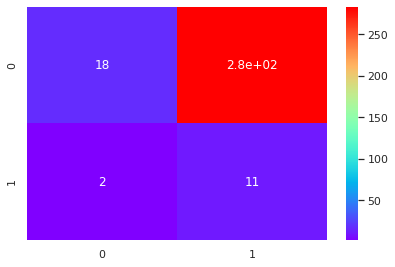

In [ ]:
# evaluating the model

# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'rainbow')

> **Isolation Forest Classifier,** Succesfully detected 11 defected items out of 13, that makes an impeccable accuracy of 85% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.

## 3.2 Local Outlier Factor


** Local Outlier Factor(LOF) Algorithm**
>The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

>The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.91      0.07      0.13       301
           1       0.04      0.85      0.07        13

    accuracy                           0.10       314
   macro avg       0.48      0.46      0.10       314
weighted avg       0.88      0.10      0.13       314



**Confusion Matrix for Local Outlier Factor**

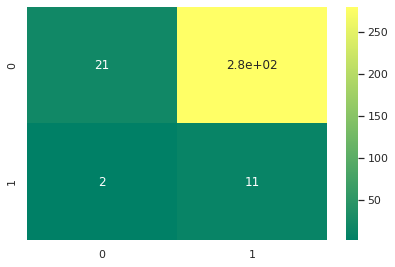

In [ ]:
# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'summer')


> **Local Outlier Factor Classifier,** Succesfully detected 11 defected items out of 13, that makes an impeccable accuracy of 85% Recall Accuracy. This algorithm would have been worked even better if the data was a little bigger with more instances of defected items.

## 3.3 One Class SVM

> In one-class SVM, the support vector model is trained on data that has only one class, which is the “normal” class. It infers the properties of normal cases and from these properties can predict which examples are unlike the normal examples. This is useful for anomaly detection because the scarcity of training examples is what defines anomalies: that is, typically there are very few examples of the network intrusion, fraud, or other anomalous behavior.

In [ ]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1, 
                    #random_state=0
                    )

model.fit(x_train, y_train)
y_pred = model.fit_predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.96      0.40      0.57       301
           1       0.04      0.62      0.08        13

    accuracy                           0.41       314
   macro avg       0.50      0.51      0.32       314
weighted avg       0.92      0.41      0.55       314



**Confusion Matrix for One Class SVM**

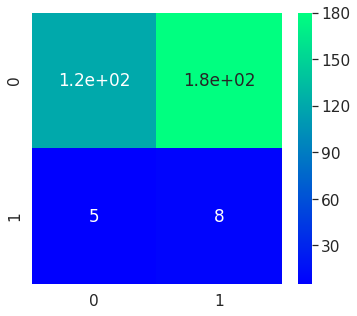

In [ ]:

# evaluating the model
# printing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm ,annot = True, cmap = 'winter')


> **One Class SVM**, Successfully Identifies 8 out of 13 defected Items, Which is not better than Isolation Forest and Local Factor Outlier Algorithm, as they both Identified 11 out 13 defected Item. Maybe, OneClassSVM would have worked better with more instances of defected items.

## Comparison of All Algorithms' Recall Rate

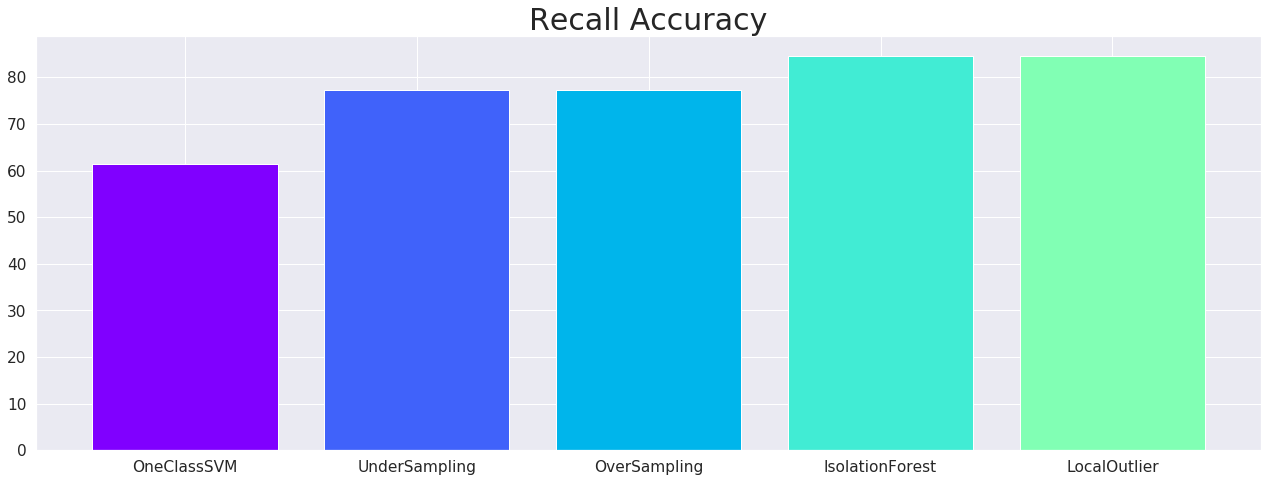

In [ ]:
Recall = np.array([77.3, 77.3, 84.6, 84.6, 61.5])
label = np.array(['UnderSampling', 'OverSampling', 'IsolationForest', 'LocalOutlier', 'OneClassSVM'])
indices = np.argsort(Recall)
color = plt.cm.rainbow(np.linspace(0, 1, 9))

plt.rcParams['figure.figsize'] = (18, 7)
plt.bar(range(len(indices)), Recall[indices], color = color)
plt.xticks(range(len(indices)), label[indices])
plt.title('Recall Accuracy', fontsize = 30)
plt.grid()
plt.tight_layout()
plt.show()

> We can see that Isolation Forest and Local Outlier Factor works best and then Over sampling and UnderSampling works Good with average performance whereas OneClass could not perform in this scenario.

**Thanks for Reading kernel, Please Suggest Changes if you have ideas.**

# DNN improve imbalanced dataset 

In [ ]:
# Load basic library
import numpy as np
import time
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import random
from sklearn.externals import joblib 
from scipy import stats
import itertools

# Load Keras
from keras.datasets import imdb
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2
from keras.layers import Dropout

#Load sklearn
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.utils import shuffle

from sklearn.metrics import log_loss 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score,balanced_accuracy_score
from sklearn.metrics import average_precision_score 

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, NMF

#ML normal ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#ML ensembles
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Special
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

#Load visual neural:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

# import require packages for plotting
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import altair as alt # no need to add altviewer
from pandas.plotting import scatter_matrix


In [ ]:
# reading the data
data = pd.read_csv('/content/drive/My Drive/Data/uci-secom.csv')

# getting the shape of the data
print(data.shape)
data.head()

(1567, 592)


,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,...,0.78,0.1827,5.7349,0.3363,39.8842,3.2687,1.0297,1.0344,0.4385,0.1039,42.3877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,533.8500,2.1113,8.95,0.3157,3.0624,0.1026,1.6765,14.9509,NaN,NaN,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,...,1.33,0.2829,7.1196,0.4989,53.1836,3.9139,1.7819,0.9634,0.1745,0.0375,18.1087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.0096,0.0201,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,...,0.85,0.0857,7.1619,0.3752,23.0713,3.9306,1.1386,1.5021,0.3718,0.1233,24.7524,267.064,0.9032,1.10,0.6219,0.4122,0.2562,0.4119,68.8489,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.0584,0.0484,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,...,39.33,0.6812,56.9303,17.4781,161.4081,35.3198,54.2917,1.1613,0.7288,0.2710,62.7572,268.228,0.6511,7.32,0.1630,3.5611,0.0670,2.7290,25.0363,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.0202,0.0149,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,...,1.98,0.4287,9.7608,0.8311,70.9706,4.9086,2.5014,0.9778,0.2156,0.0461,22.0500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,NaN,NaN,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


## Remove nan columns and nan rows

In [ ]:
# checking if the dataset contains any NULL values
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [ ]:
print(data.shape)
len_data=len(data)
len_data

(1567, 592)


1567

In [ ]:
new_data=data.copy()
for name in data.columns:
  num_na=data[name].isnull().sum()
  if num_na > len_data*0.01:
    new_data=new_data.drop([name],axis=1)
print(new_data.shape)
print(new_data.dropna().shape)

(1567, 489)
(1477, 489)


In [ ]:
new_data=new_data.dropna()
new_data.shape

(1477, 489)

In [ ]:
new_data = new_data.drop(columns = ['Time'], axis = 1)
# checking the shape of the data after deleting a column
new_data.shape

(1477, 488)

In [ ]:
new_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,558,559,560,561,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,-0.0148,0.9627,200.5470,0.0,10.1548,414.7347,9.2599,0.9701,191.2872,12.4608,1.3825,-5441.50,2604.25,-3498.75,-1640.25,1.2973,2.0143,7.3900,68.4222,2.2667,0.2102,3.4171,84.9052,9.7997,50.6596,64.2828,49.3404,64.9193,87.5241,118.1188,...,8.8370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,0.9634,0.1745,0.0375,18.1087,535.0164,2.4335,5.92,0.2653,2.0111,0.0772,1.1065,10.9003,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,0.0,9.5157,416.7075,9.3144,0.9674,192.7035,12.5404,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,2.0295,7.5788,67.1333,2.3333,0.1734,3.5986,84.7569,8.6590,50.1530,64.1114,49.8470,65.8389,84.7327,118.6128,...,6.4568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1538,2.9667,9.3046,0.1096,0.0078,0.0026,7.116,1.5021,0.3718,0.1233,24.7524,535.0245,2.0293,11.21,0.1882,4.0923,0.0640,2.0952,9.2721,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,-0.0033,0.9629,201.8482,0.0,9.6052,422.2894,9.6924,0.9687,192.1557,12.4782,1.4011,-5468.25,2648.25,-4515.00,-1657.25,1.3137,2.0038,7.3145,62.9333,2.6444,0.2071,3.3813,84.9105,8.6789,50.5100,64.1125,49.4900,65.1951,86.6867,117.0442,...,6.4865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.1565,3.2465,7.7754,0.1096,0.0078,0.0026,7.116,1.1613,0.7288,0.2710,62.7572,530.5682,2.0253,9.33,0.1738,2.8971,0.0525,1.7585,8.5831,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,-0.0072,0.9569,201.9424,0.0,10.5661,420.5925,10.3387,0.9735,191.6037,12.4735,1.3888,-5476.25,2635.25,-3987.50,117.00,1.2887,1.9912,7.2748,62.8333,3.1556,0.2696,3.2728,86.3269,8.7677,50.2480,64.1511,49.7520,66.1542,86.1468,121.4364,...,6.3745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0579,1.9999,9.4805,0.1096,0.0078,0.0026,7.116,0.9778,0.2156,0.0461,22.0500,532.0155,2.0275,8.83,0.2224,3.1776,0.0706,1.6597,10.9698,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
5,2946.25,2432.84,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5287,0.0167,0.0055,0.9699,200.4720,0.0,8.6617,414.2426,9.2441,0.9747,191.2280,12.4935,1.3836,-6058.00,2953.75,-3906.50,193.75,0.8930,1.7775,3.0505,62.3778,1.6333,0.1394,3.5200,85.4233,9.6484,50.5795,64.0720,49.4205,66.2949,87.0273,117.4928,...,7.0970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7910,2.9799,9.5796,0.1096,0.0078,0.0026,7.116,0.9469,0.2900,0.0604,30.6277,534.2091,2.3236,8.91,0.3201,2.2598,0.0899,1.6679,13.7755,0.4949,0.0189,0.0044,3.8276,0.0342,0.0151,0.0052,44.0077,-1


In [ ]:
X=new_data.iloc[:,:-1]
X.shape

(1477, 487)

In [ ]:
y=new_data.iloc[:,-1]

## Method ML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, 
                                    random_state=2018, stratify=y)

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

          -1       0.93      1.00      0.96       276
           1       0.00      0.00      0.00        20

    accuracy                           0.93       296
   macro avg       0.47      0.50      0.48       296
weighted avg       0.87      0.93      0.90       296



In [ ]:
xgb=XGBClassifier(scale_pos_weight=20)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

          -1       0.95      0.97      0.96       276
           1       0.36      0.25      0.29        20

    accuracy                           0.92       296
   macro avg       0.65      0.61      0.63       296
weighted avg       0.91      0.92      0.91       296



In [ ]:
xgb=XGBClassifier(n_estimators = 500,scale_pos_weight=20)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

          -1       0.94      1.00      0.97       276
           1       0.67      0.10      0.17        20

    accuracy                           0.94       296
   macro avg       0.80      0.55      0.57       296
weighted avg       0.92      0.94      0.91       296



In [ ]:
xgb=XGBClassifier(scale_pos_weight=20,max_depth=1)
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print('classification_report \n',classification_report(y_test, y_pred))

classification_report 
               precision    recall  f1-score   support

          -1       0.97      0.72      0.83       276
           1       0.15      0.65      0.24        20

    accuracy                           0.72       296
   macro avg       0.56      0.69      0.53       296
weighted avg       0.91      0.72      0.79       296



In [ ]:
XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## Try all sampling method

In [ ]:
from imblearn.under_sampling import RandomUnderSampler,NearMiss,RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN,CondensedNearestNeighbour,OneSidedSelection,NeighbourhoodCleaningRule
from imblearn.over_sampling import ADASYN,SMOTE, BorderlineSMOTE, SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

In [ ]:
list_method={
# Under sampling
'NearMiss':NearMiss(),
'RandomUnderSampler':RandomUnderSampler(random_state=0),
'RepeatedEditedNearestNeighbours':RepeatedEditedNearestNeighbours(random_state=0), # Very long
'AllKNN':AllKNN(random_state=0),
#'CondensedNearestNeighbour':CondensedNearestNeighbour(random_state=0),
'OneSidedSelection':OneSidedSelection(random_state=0),
'NeighbourhoodCleaningRule':NeighbourhoodCleaningRule(random_state=0),

# Over sampling
'RandomOverSampler':RandomOverSampler(random_state=0),
'SMOTE':SMOTE(random_state=0),
'ADASYN':ADASYN(random_state=0),
'BorderlineSMOTE-1':BorderlineSMOTE(random_state=0, kind='borderline-1'),
'BorderlineSMOTE-2':BorderlineSMOTE(random_state=0, kind='borderline-2'),
'SVMSMOTE':SVMSMOTE(random_state=0),
}

In [ ]:
import time
for name,method in list_method.items():
  
  t0=time.time()
  print(name)
  X_train_transform, y_train_transform= method.fit_sample(X_train, y_train)
  model=LGBMClassifier()
  model.fit(X_train_transform, y_train_transform)
  predictions=model.predict(X_test)
  #y_test_labels = np.argmax(y_test.values, axis =1)
  t1=time.time()
  print('time',t1-t0)
  print(classification_report(y_test,predictions))

NearMiss


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 0.29730892181396484
              precision    recall  f1-score   support

          -1       0.97      0.26      0.41       276
           1       0.08      0.90      0.15        20

    accuracy                           0.30       296
   macro avg       0.53      0.58      0.28       296
weighted avg       0.91      0.30      0.39       296

RandomUnderSampler


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 0.20457959175109863
              precision    recall  f1-score   support

          -1       0.97      0.61      0.74       276
           1       0.11      0.70      0.20        20

    accuracy                           0.61       296
   macro avg       0.54      0.65      0.47       296
weighted avg       0.91      0.61      0.71       296

RepeatedEditedNearestNeighbours


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 6.630911111831665
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       276
           1       0.50      0.10      0.17        20

    accuracy                           0.93       296
   macro avg       0.72      0.55      0.57       296
weighted avg       0.91      0.93      0.91       296

AllKNN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 6.104583978652954
              precision    recall  f1-score   support

          -1       0.94      0.99      0.96       276
           1       0.50      0.10      0.17        20

    accuracy                           0.93       296
   macro avg       0.72      0.55      0.57       296
weighted avg       0.91      0.93      0.91       296

OneSidedSelection


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 5.839823246002197
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       276
           1       0.00      0.00      0.00        20

    accuracy                           0.93       296
   macro avg       0.47      0.50      0.48       296
weighted avg       0.87      0.93      0.90       296

NeighbourhoodCleaningRule


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is depr

time 6.004274845123291
              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       276
           1       0.00      0.00      0.00        20

    accuracy                           0.93       296
   macro avg       0.47      0.50      0.48       296
weighted avg       0.87      0.93      0.90       296

RandomOverSampler


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 7.011612176895142
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       276
           1       1.00      0.05      0.10        20

    accuracy                           0.94       296
   macro avg       0.97      0.53      0.53       296
weighted avg       0.94      0.94      0.91       296

SMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 8.133451461791992
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       276
           1       0.67      0.10      0.17        20

    accuracy                           0.94       296
   macro avg       0.80      0.55      0.57       296
weighted avg       0.92      0.94      0.91       296

ADASYN


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 8.19038987159729
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       276
           1       1.00      0.05      0.10        20

    accuracy                           0.94       296
   macro avg       0.97      0.53      0.53       296
weighted avg       0.94      0.94      0.91       296

BorderlineSMOTE-1


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 8.08810830116272
              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       276
           1       0.50      0.05      0.09        20

    accuracy                           0.93       296
   macro avg       0.72      0.52      0.53       296
weighted avg       0.91      0.93      0.91       296

BorderlineSMOTE-2


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



time 7.973191261291504
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       276
           1       1.00      0.10      0.18        20

    accuracy                           0.94       296
   macro avg       0.97      0.55      0.58       296
weighted avg       0.94      0.94      0.92       296

SVMSMOTE


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

time 8.19348669052124
              precision    recall  f1-score   support

          -1       0.94      1.00      0.96       276
           1       0.50      0.05      0.09        20

    accuracy                           0.93       296
   macro avg       0.72      0.52      0.53       296
weighted avg       0.91      0.93      0.91       296



## outlier detection

In [13]:
y_train.value_counts()

-1    1101
 1      80
Name: Pass/Fail, dtype: int64

In [19]:
# defining outlier fraction

Fraud = y_train.value_counts()[1]
Valid = y_train.value_counts()[-1]

outlier_fraction = Fraud/Valid
print("Outlier Fraction :", outlier_fraction)

Outlier Fraction : 0.07266121707538602


In [21]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(n_estimators=100, max_samples=len(X_train), 
                                       contamination=outlier_fraction, random_state=0, verbose=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.84      0.09      0.17       276
           1       0.06      0.75      0.11        20

    accuracy                           0.14       296
   macro avg       0.45      0.42      0.14       296
weighted avg       0.79      0.14      0.17       296



In [23]:
from sklearn.neighbors import LocalOutlierFactor


model = LocalOutlierFactor(n_neighbors=20, algorithm='auto', leaf_size=30, metric='minkowski', p=2, 
                           metric_params=None, contamination=outlier_fraction)

model.fit(X_train, y_train)
y_pred = model.fit_predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.07      0.13       276
           1       0.06      0.85      0.12        20

    accuracy                           0.12       296
   macro avg       0.46      0.46      0.12       296
weighted avg       0.81      0.12      0.13       296



In [24]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel ='rbf', degree=3, gamma=0.1,nu=0.005, max_iter=-1, 
                    #random_state=0
                    )
model.fit(X_train, y_train)
y_pred = model.fit_predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.93      0.81      0.87       276
           1       0.07      0.20      0.11        20

    accuracy                           0.77       296
   macro avg       0.50      0.51      0.49       296
weighted avg       0.88      0.77      0.82       296

